In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
data = {
    'thickness': [0.85, 0.90, 0.70, 0.60, 0.50, 0.45, 0.95, 0.65, 0.55],
    'brightness': [75, 80, 65, 60, 55, 50, 85, 62, 58],
    'smoothness': [0.32, 0.30, 0.45, 0.50, 0.55, 0.60, 0.28, 0.48, 0.52],
    'opacity': [90, 88, 85, 82, 80, 78, 92, 83, 79],
    'tensile_strength': [25, 27, 20, 18, 15, 14, 29, 19, 16],
    'grade': ['Grade A', 'Grade A', 'Grade B', 'Grade B', 'Grade C', 'Grade C', 'Grade A', 'Grade B', 'Grade C']
}
df = pd.DataFrame(data)

In [12]:
# --- Encode target variable ---
le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['grade'])  # Converts Grade A/B/C to 0/1/2

In [13]:
# Features and target
X = df.drop(['grade', 'grade_encoded'], axis=1)
y = df['grade_encoded']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Logistic Regression ---
Accuracy: 1.0000
              precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00         1
     Grade B       1.00      1.00      1.00         1
     Grade C       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



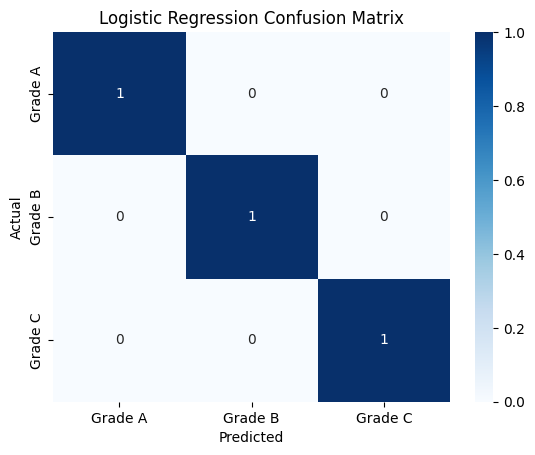

--- KNN ---
Accuracy: 0.3333
              precision    recall  f1-score   support

     Grade A       0.50      1.00      0.67         1
     Grade B       0.00      0.00      0.00         1
     Grade C       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


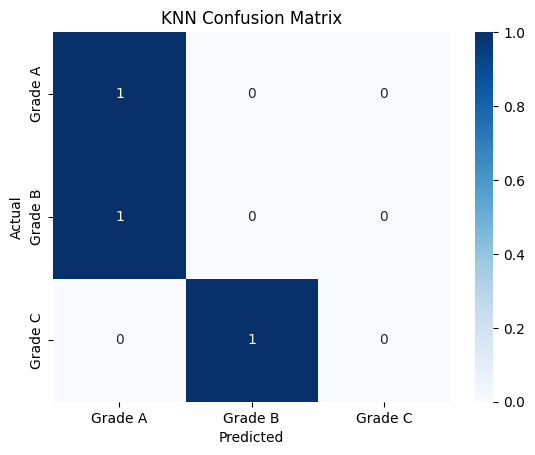

--- SVM ---
Accuracy: 1.0000
              precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00         1
     Grade B       1.00      1.00      1.00         1
     Grade C       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



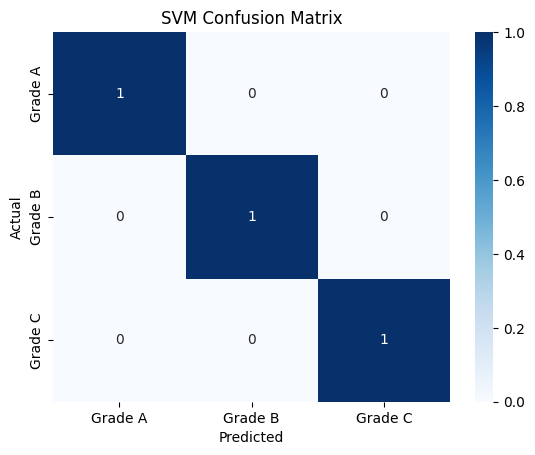

--- Random Forest ---
Accuracy: 1.0000
              precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00         1
     Grade B       1.00      1.00      1.00         1
     Grade C       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



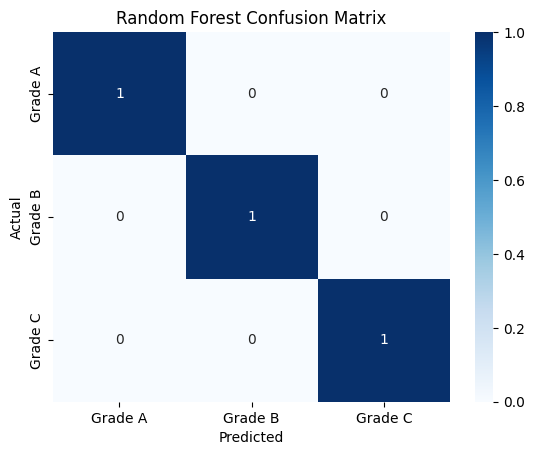

--- Gradient Boosting ---
Accuracy: 0.6667
              precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00         1
     Grade B       0.50      1.00      0.67         1
     Grade C       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


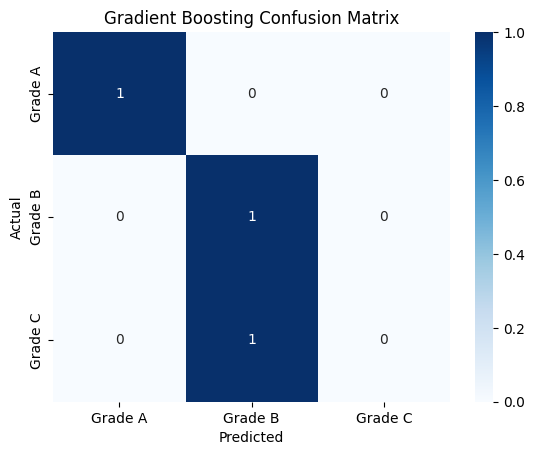

In [17]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [18]:
ensemble = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'
)
ensemble.fit(X_train_scaled, y_train)
y_pred_ens = ensemble.predict(X_test_scaled)
print("--- Ensemble Model ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ens):.4f}")
print(classification_report(y_test, y_pred_ens, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Ensemble Model ---
Accuracy: 0.6667
              precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00         1
     Grade B       0.50      1.00      0.67         1
     Grade C       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


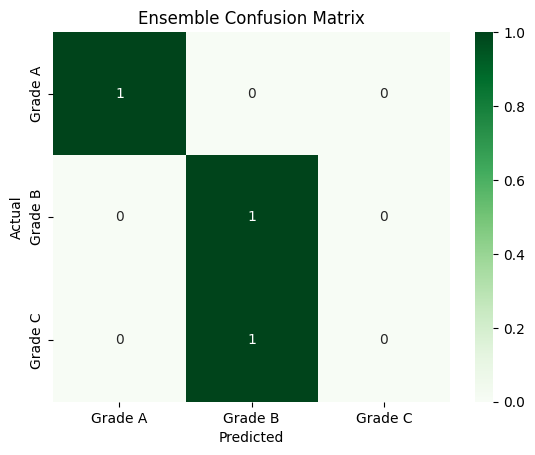

In [19]:
cm_ens = confusion_matrix(y_test, y_pred_ens)
sns.heatmap(cm_ens, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Ensemble Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


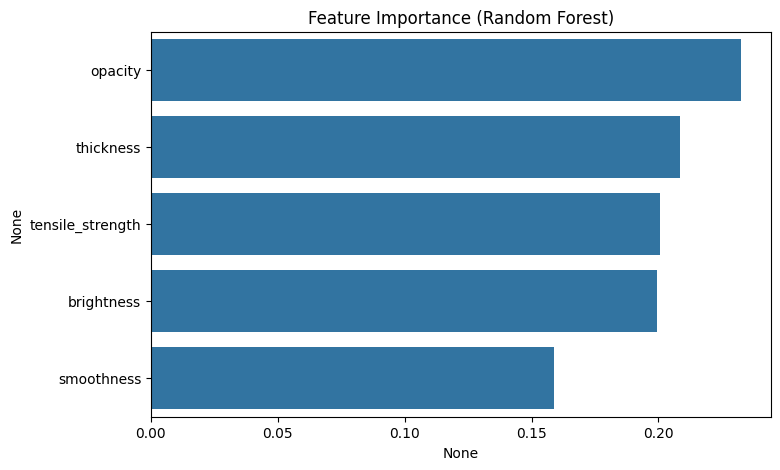

In [20]:
rf = models['Random Forest']
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [21]:
def classify_paper(sample_dict):
    sample_df = pd.DataFrame([sample_dict])
    sample_scaled = scaler.transform(sample_df)
    pred_encoded = ensemble.predict(sample_scaled)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]
    proba = ensemble.predict_proba(sample_scaled)[0]
    proba_dict = dict(zip(le.classes_, proba))
    return pred_label, proba_dict

In [22]:
sample = {
    'thickness': 0.68,
    'brightness': 64,
    'smoothness': 0.44,
    'opacity': 84,
    'tensile_strength': 21
}

predicted_grade, probabilities = classify_paper(sample)
print(f"Predicted Grade: {predicted_grade}")
print("Class Probabilities:", probabilities)

Predicted Grade: Grade B
Class Probabilities: {'Grade A': np.float64(0.208527293809609), 'Grade B': np.float64(0.606143838231627), 'Grade C': np.float64(0.18532886795876397)}
